<a href="https://colab.research.google.com/github/onishiryo/ResProjLorenz/blob/main/lorenz63_3Dplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

================
Lorenz Chaos
================
Edward N. Lorenz(1963), `"Deterministic Nonperiodic Flow"
https://doi.org/10.1175/1520-0469(1963)020%3C0130:DNF%3E2.0.CO;2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


まずは必要なライブラリをimportしておく

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for projection='3d'

# Lorenz 63 model
$$
\left\{
\begin{array}{lcl}
    \frac{dx}{dt} &=& \sigma (y-x) \\
    \frac{dy}{dt} &=& x(\rho -z) -y \\
    \frac{dz}{dt} &=& xy -\beta z
\end{array}
\right.
$$
$$ \sigma=10, \rho=28, \beta=8/3 $$

In [3]:
def lorenz_dot(x,y,z):
    '''
    Given:
       (x,y,z)
    Defined:
       (s, r, b: parameters for the lorenz system)
    Returns:
       (dx/dt,dy/dt,dz/dt): temporal derivatives
    '''

# parameters for lorenz system
    s= 10.0; r= 28.0; b= 8.0/3 

    dxdt= s*(y - x)
    dydt= x*(r - z)
    dzdt= x*y - b*z
    #
    return dxdt,dydt,dzdt

In [4]:
def lorenz_system_integrate(t, x0,y0,z0):
    # integration of ( nonlinear ) lorenz system with RK2
    #
    nstep= len(t)
    dt= t[1]-t[0] #time interval, dt
    xt, yt, zt= np.zeros([nstep]), np.zeros([nstep]), np.zeros([nstep]) #zero set
    xt[0], yt[0], zt[0] = x0, y0, z0
    for n in range(nstep-1): #0,1,2,,,nstep-2
        #RK first step
        dxdt,dydt,dzdt= lorenz_dot(xt[n],yt[n],zt[n])
        xtm, ytm, ztm = xt[n]+dxdt*dt*0.5, yt[n]+dydt*dt*0.5, zt[n]+dzdt*dt*0.5
        #RK second step
        dxdt,dydt,dzdt= lorenz_dot(xtm,ytm,ztm)
        xt[n+1], yt[n+1], zt[n+1]= xt[n]+dxdt*dt, yt[n]+dydt*dt, zt[n]+dzdt*dt;        
    #
    print("final n =",n)
    return xt,yt,zt

# 初期位置(x0,y0,z0)を設定する。
- [ToDo 1] 初期位置を変えてみよう

In [49]:
# Set initial values for lorenz system
t0= 0.0
#x0= -1.34; y0= -1.34; z0= 18.1 #(x0,y0,z0)
x0= -1.34001; y0= -1.34; z0= 18.1 #(x0,y0,z0)

print("initial value(x0,y0,z0) =",x0,y0,z0)

initial value(x0,y0,z0) = -1.34001 -1.34 18.1


# 計算時間の設定
- [Todo 2] 計算時間Tendを変更しよう

In [50]:
# time setting
Tend= 10.0                   #end time
dt= 1.0e-5                   #time interval
nstep= int((Tend-t0)/dt+0.5) #number of time steps     
t= t0 + np.arange(0, nstep, 1)*dt #t[0:nstep]
print("Tend = ",Tend)
print("number of steps = ",nstep)

Tend =  10.0
number of steps =  1000000


In [51]:
# calculate temporal evolution of position
xt,yt,zt = lorenz_system_integrate(t, x0,y0,z0)
print("Lorenz63 solved!")
print("final x position is ",xt[nstep-1])

final n = 999998
Lorenz63 solved!
final x position is  -3.897222162076178


| dt   |   x  |
| ---- | ---- |
| 1e-2 | -9.853999637185208 |
| 1e-3 | -4.148700518255394 |
| 1e-4 | -3.9364866274388066 |
| 1e-5 | -3.931420186413808 |
| 1e-6 | -3.930991052926973 |
| 1e-5(but with x0+0.00001) | -3.897222162076178 | 
| 1e-5(but with x0+0.0001) | -3.6892108728289075 | 
| 1e-5(but with x0+0.001) | -6.301670988322143 |
| 1e-5(but with x0+0.01) | 3.985450724142571 | 




In [8]:
print("nstep=",nstep)
#nstep should be "final n"+2

nstep= 1000


In [9]:
#print("xt=",xt)

xt= [-1.34000000e+00 -1.34006633e+00 -1.34026462e+00 -1.34059420e+00
 -1.34105440e+00 -1.34164458e+00 -1.34236413e+00 -1.34321244e+00
 -1.34418892e+00 -1.34529301e+00 -1.34652415e+00 -1.34788180e+00
 -1.34936547e+00 -1.35097464e+00 -1.35270883e+00 -1.35456759e+00
 -1.35655046e+00 -1.35865703e+00 -1.36088687e+00 -1.36323959e+00
 -1.36571482e+00 -1.36831219e+00 -1.37103137e+00 -1.37387203e+00
 -1.37683386e+00 -1.37991656e+00 -1.38311986e+00 -1.38644351e+00
 -1.38988726e+00 -1.39345088e+00 -1.39713417e+00 -1.40093693e+00
 -1.40485898e+00 -1.40890018e+00 -1.41306037e+00 -1.41733943e+00
 -1.42173725e+00 -1.42625373e+00 -1.43088880e+00 -1.43564238e+00
 -1.44051445e+00 -1.44550496e+00 -1.45061390e+00 -1.45584128e+00
 -1.46118710e+00 -1.46665142e+00 -1.47223427e+00 -1.47793572e+00
 -1.48375585e+00 -1.48969476e+00 -1.49575256e+00 -1.50192937e+00
 -1.50822536e+00 -1.51464066e+00 -1.52117546e+00 -1.52782994e+00
 -1.53460432e+00 -1.54149882e+00 -1.54851366e+00 -1.55564911e+00
 -1.56290543e+00 -1.5

In [10]:
print("xt[nstep-1] =",xt[nstep-1])

xt[nstep-1] = 12.82756772629292


In [11]:
print("xt[nstep-1],yt[nstep-1],zt[nstep-1] =",xt[nstep-1],yt[nstep-1],zt[nstep-1])

xt[nstep-1],yt[nstep-1],zt[nstep-1] = 12.82756772629292 15.951742608672223 30.306655456217776


# 得られたデータをmatplotlib（先にimportしてある）を使って可視化する。
- 始点が赤点で示されるはず
- [ToDo 3]終点を青点で示すように改変してみよう

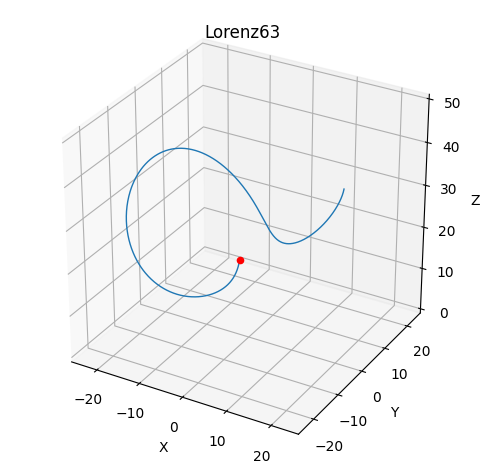

In [12]:
# make 3D Plot
fig= plt.figure(figsize=(6, 6), dpi=100)
ax = fig.gca(projection='3d')
# 描画のカスタマイズ
ax.set_title("Lorenz63")
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
ax.set_xlim(-25, 25); ax.set_ylim(-25, 25); ax.set_zlim(  0, 50)

# show 3D trajectory figure
ax.plot(xt[:], yt[:], zt[:], lw=1.0)
ax.scatter(xt[0],yt[0],zt[0],color= 'red') #plot the initial position
plt.show()
fig.savefig("trajectory.png")

# ToDoリスト
- [ ] ToDo 1　始点を変えてみよう
- [ ] ToDo 2　計算時間をを1にしてみよう
- [ ] ToDo 3　終点を青点で示すように改変してみよう
